In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cufflinks as cf
import os

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline 

os.chdir('')

In [112]:
cf.go_offline()

In [113]:
df = pd.read_csv('titanic_train.csv')

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df['Age'].isnull().iplot(kind='hist')
#This Histogram shows that there are missing values for the ages of the passengers, a little under 200 missing ages.
#The algorithms won't learn correctly with a NaN instead of a number, so we need to either drop those rows (which would lose a lot of data)
#or, we can fill those missing values with the median ages based on the classes. 
#We use the classes due to the fact that higher classed ticket passangers typically were older and tended to survive
#However, lower classes had younger people, who most likely died.

In [119]:
df[['Pclass','Age']].pivot(columns='Pclass', values='Age').iplot(kind='box')

In [120]:
def median_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
#This Function median_age is going to serve the purpose of filling in all my not avaliable values in the age column. 
#Using the above box plot, we know the median ages and just fill in those values for the missing ages bassed on their class 

In [121]:
df['Age'] = df[['Age', 'Pclass']].apply(median_age, axis=1)

In [122]:
df['Age'].isnull().iplot(kind='hist')

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df['Enum_sex'] = pd.factorize(df['Sex'])[0]

In [ ]:
#We must include the sexes as males tended to die more frequently than females. 
#This is due to the old trope that is completely accurate in these sorts of situtaions: women, children and the elderly first

In [25]:
X = df[['Enum_sex', 'Fare', 'Parch','SibSp','Age']]

In [29]:
y = df['Survived']

In [27]:
logmod = LogisticRegression()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
fitlog = logmod.fit(X_train, y_train)

c:\users\caleb\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [32]:
predlog = logmod.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predlog))

[[154  21]
 [ 36  84]]


In [37]:
print(classification_report(y_test, predlog))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       175
           1       0.80      0.70      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.80       295



In [ ]:
#The accuracy of the logistic regression model was an 81%, which is pretty good. 
#There is always room to improve, namely, we could add a second column that represents the female sex 
#instead of making it a binary sex column, we could one hot encode it instead


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
dtclass = DecisionTreeClassifier()

In [40]:
dtclass.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
dtpred = dtclass.predict(X_test)

In [44]:
print(confusion_matrix(y_test,dtpred))

[[144  31]
 [ 31  89]]


In [45]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       175
           1       0.74      0.74      0.74       120

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [ ]:
#The Decision Tree Classifier performed with a 79% Accuracy.
#This is worse than the Logistic Regression accuracy of 81%

In [48]:
rfclass = RandomForestClassifier(n_estimators=250)

In [49]:
rfclass.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rfpred = rfclass.predict(X_test)

In [52]:
print(confusion_matrix(y_test, rfpred))

[[150  25]
 [ 33  87]]


In [54]:
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       175
           1       0.78      0.72      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [ ]:
#The Random Forests Classifier performed with an 80% accurcay with a 250 number of estimators. 
#This is better than the Decision Treee classifier, but still lower than the Logistic Regression Model

In [89]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

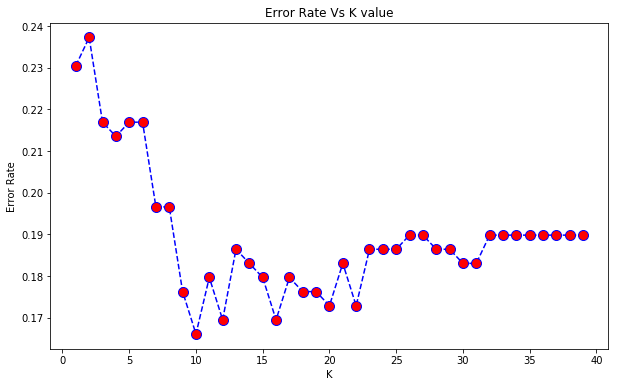

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [93]:
kmodel = KNeighborsClassifier(n_neighbors=9)

In [94]:
kmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [95]:
kpred = kmodel.predict(X_test)

In [96]:
print(confusion_matrix(y_test, kpred))
print(classification_report(y_test, kpred))

[[153  22]
 [ 30  90]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       175
           1       0.80      0.75      0.78       120

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.82       295
weighted avg       0.82      0.82      0.82       295



In [ ]:
#Finally, the KNN Classifier model performed with a 82% accuracy, which is better than the Logistic Regression Accuracy. 
#However, this isn;t enough to warrant solving the Titanic problem with K nearest neighbors instead. 
#KNN requires more work and more visualizations for only a 1% increase in the prediciton.